In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
for row in session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(15).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [11]:
last_date_precip = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date_precip)

('2017-08-23',)


In [12]:
yr_bef = dt.date(2017,8,23) - dt.timedelta(days=365)
print(yr_bef)

2016-08-23


In [13]:
# Design a query to retrieve the last 12 months of precipitation data.
# Select only the `date` and `prcp` values.

date_precip=session.query(Measurement.date, Measurement.prcp,).\
    filter(Measurement.date > yr_bef).\
    order_by(Measurement.date).all()
date_precip

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [14]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
# Sort the DataFrame values by `date`.

df = pd.DataFrame(date_precip, columns=['date', 'prcp'])

# Change the datatype of date column from element to datetime object on Pandas
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Set the index to date
df.set_index('date', inplace=True)
df.sort_values(by='date', ascending=True)
df.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


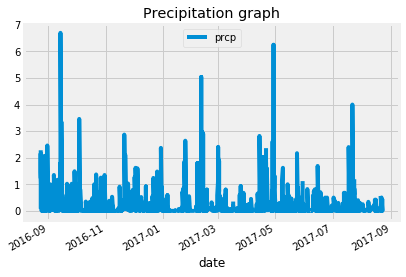

In [15]:
# Plot the results using the DataFrame `plot` method.
# Use Pandas to print the summary statistics for the precipitation data.

df.plot(title="Precipitation graph")
plt.legend(loc='upper center')
plt.savefig("Images/prcp.png")
plt.show()

In [16]:
### Station Analysis

# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()      

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
station_cnt = session.query(Station.station).distinct().count()
station_cnt

9

In [31]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).order_by('count desc').all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Which station has the highest number of observations?
observations=session.query(Measurement.station, func.count(Measurement.station).label('count')).\
    group_by(Measurement.station).order_by('count desc').all()
highest_obs_station = observations[0][0]
highest_obs_station

'USC00519281'

In [20]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).

#Filter by the station with the highest number of observations.


tobs_last1yr=session.query(Measurement.station, Measurement.tobs, Measurement.date).\
    filter(Measurement.date > yr_bef).\
    filter(Measurement.station==highest_obs_station).\
    order_by(Measurement.date).all()
tobs_last1yr




[('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC00519281', 78.0, '2016-09-18'),
 ('USC005192

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
               
highest_temp=session.query(func.max(Measurement.tobs)).\
  filter(Measurement.station==highest_obs_station).\
  filter(Measurement.date > yr_bef).all()

lowest_temp=session.query(func.min(Measurement.tobs)).\
  filter(Measurement.station==highest_obs_station).\
  filter(Measurement.date > yr_bef).all()

avg_temp=session.query(func.avg(Measurement.tobs)).\
  filter(Measurement.station==highest_obs_station).\
  filter(Measurement.date > yr_bef).all()

print("The highest temperature recorded - "+str(highest_temp))
print("The lowest temperature recorded - "+str(lowest_temp))
print("The average temperature recorded - "+str(avg_temp))

The highest temperature recorded - [(83.0,)]
The lowest temperature recorded - [(59.0,)]
The average temperature recorded - [(73.0968660968661,)]


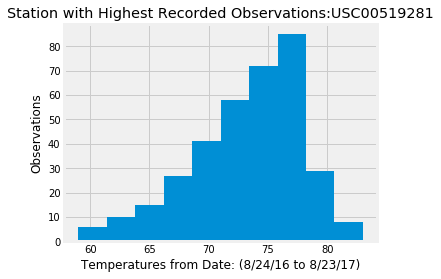

In [22]:
#Plot the results as a histogram with `bins=12`

temp_graph = plt.figure(figsize=(5,4))
plt.grid(True)
temp_df = pd.DataFrame(tobs_last1yr)
plt.hist(temp_df['tobs'])
bin_size = 12
plt.xlabel("Temperatures from Date: (8/24/16 to 8/23/17)")
plt.ylabel("Observations")
plt.title("Station with Highest Recorded Observations:" + highest_obs_station)
plt.show()

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print("Trip dates temperature")
print(calc_temps('2017-01-01', '2017-01-10'))

arrival_date = dt.date(2017, 1, 1)
departure_date = dt.date(2017, 1, 10)
one_year_ago = dt.timedelta(days=365)
tavg_year_ago = (calc_temps((arrival_date-one_year_ago), (departure_date-one_year_ago)))
print(tavg_year_ago)


Trip dates temperature
[(60.0, 68.0327868852459, 77.0)]
[(62.0, 70.40677966101696, 78.0)]


<Figure size 360x288 with 0 Axes>

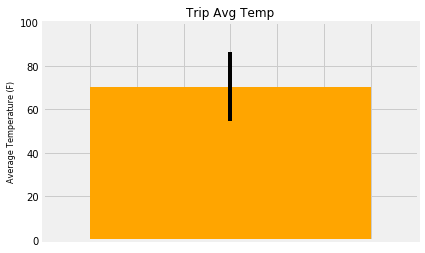

In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

y_err = tavg_year_ago[0][2] - tavg_year_ago[0][0]

# Y value is the average temperature for the trip's date range; X is zero since we only need one bar
y = [tavg_year_ago[0][1]]
x = 0

trip_graph = plt.figure(figsize=(5,4))
fig, ax = plt.subplots()

# Add  labels, title and axes ticks
ax.set_ylabel("Average Temperature (F)", fontsize=8)
ax.set_title("Trip Avg Temp", fontsize=12)

# Set the limits of the x and y axes, no tick params
ax.bar(x, y, width=1.5, color="orange", yerr=y_err)
ax.set_xlim(-1, 1)
ax.set_ylim(0, 100)
ax.set_xbound(lower=-1, upper=1)
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()


In [26]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def precip(start_date, end_date):
    
        # Docstring for the function `calc_temps`
    """Precipitation information per weather station
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        A list of tuples containing precipitation amount, station, name, latitude, longitude, and elevation in descending order.
    """
    
    sel = [Measurement.station, 
           Station.name, 
           Station.latitude, 
           Station.longitude, 
           Station.elevation, 
           Measurement.prcp]
    
    return session.query(*sel).\
            filter(Measurement.station == Station.station).\
            filter(Measurement.date >= start_date).\
            filter(Measurement.date <= end_date).\
            group_by(Measurement.station).\
            order_by(Measurement.prcp.desc()).all()

print(precip('2017-01-01','2017-01-10'))

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.29), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.03), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.03), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, None)]


## Optional Challenge Assignment

In [27]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [28]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [29]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [30]:
# Plot the daily normals as an area plot with `stacked=False`
